In [129]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['figure.figsize'] = (8,4)

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [130]:
import pandas as pd
from IPython.html.widgets import *
from scipy.signal import filtfilt, butter
from scipy.signal import resample

In [172]:
df = pd.read_csv('./Signal_50Hz_Spike1.csv', header=None)
raw_data = df.values[1:,:]

In [173]:
raw_data = asarray(raw_data,dtype=float)
raw_data = raw_data*1e6

In [174]:
dt = 2.5e-5; fs = 1/dt
T = len(raw_data)*dt
t = linspace(0,T,len(raw_data))

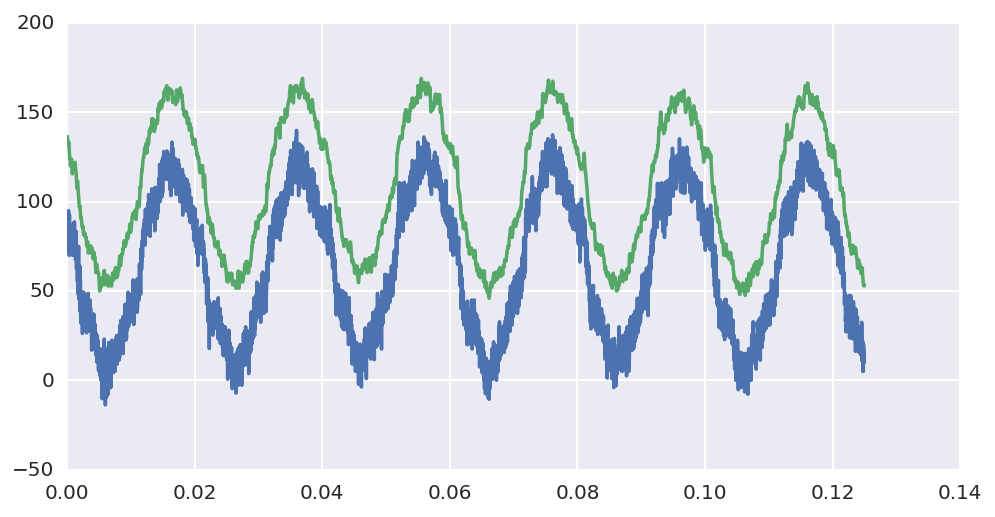

In [185]:
plot(t[:5000],raw_data[:5000,:])

In [176]:
from scipy import signal

In [177]:
sig_ch1 = raw_data[:,0]
f, Pxx_den = signal.welch(sig_ch1, fs, nperseg=256*30, noverlap=128)

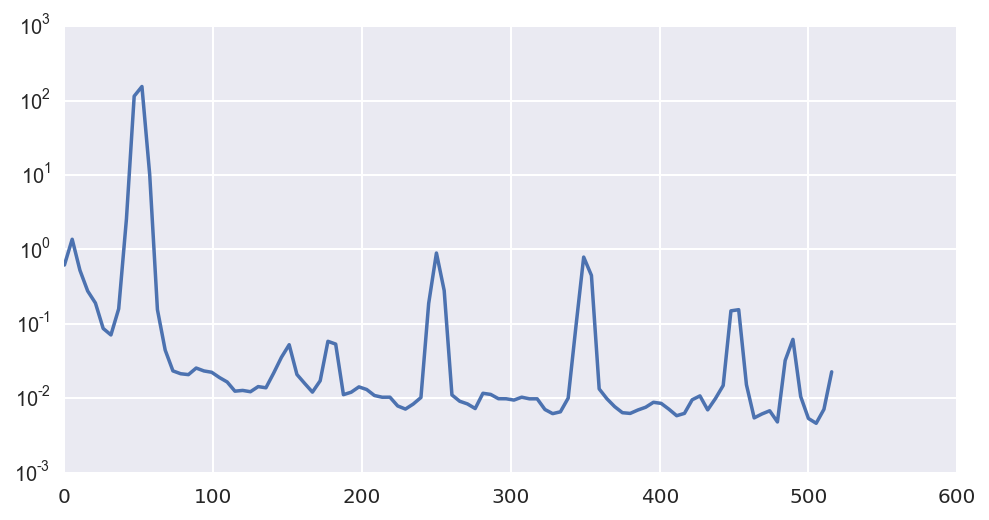

In [178]:
semilogy(f[0:100],Pxx_den[0:100])

In [179]:
# Create an order 3 bandpass butterworth filter.
def butter_bandpass(lowcut, highcut, fs, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def peakdet(v, delta, x = None):
    maxtab = []
    mintab = []
    if x is None:
        x = arange(len(v))
    v = asarray(v)
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    lookformax = True
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True
    return array(maxtab), array(mintab)

In [180]:
b, a = butter_bandpass(300,2000,fs)

In [182]:
y = filtfilt(b, a, raw_data.T, padlen=150, padtype="even")

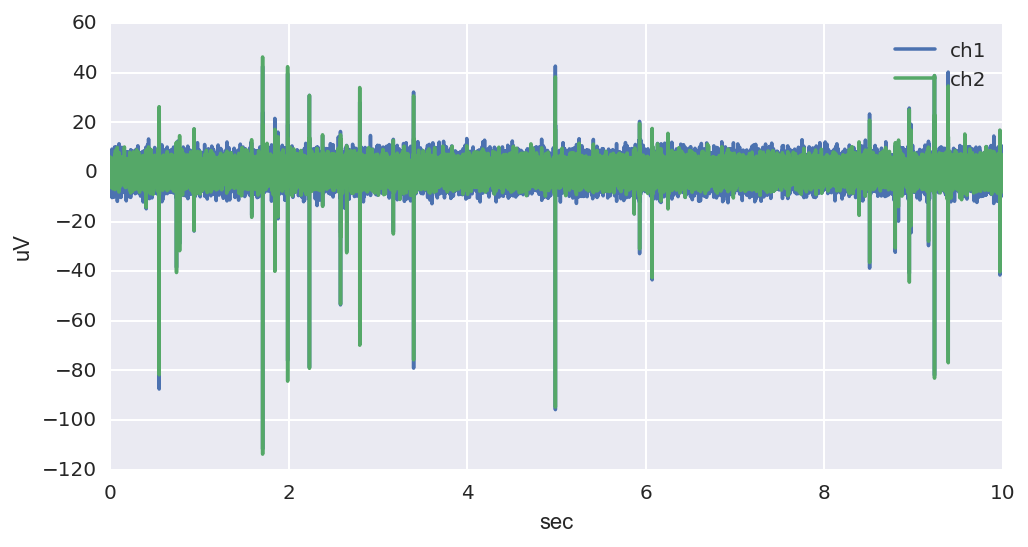

In [183]:
import seaborn as sns
fig = figure()
ax = fig.add_subplot(111)
ax.plot(t,y[0,:],label='ch1')
ax.plot(t,y[1,:],label='ch2')
xlabel('sec')
ylabel('uV')
ax.legend()

In [96]:
fig.savefig('10sec_recording.png', bbox_inches='tight')

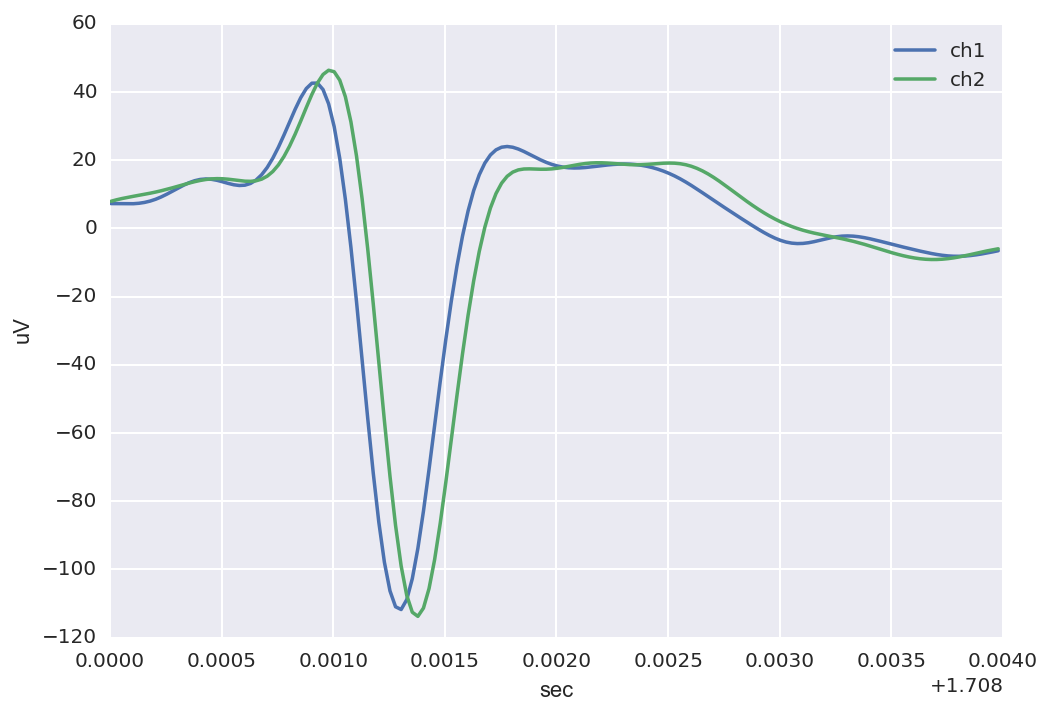

In [115]:
@interact(offset=(t[0],t[-1],dt))
def slide_sig(offset=1.706):
    fig = figure()
    ax = fig.add_subplot(111)
    idx = np.logical_and(t<0.006+offset, t>0.002+offset)
    ax.plot(t[idx],y[0,idx],label='ch1')
    ax.plot(t[idx],y[1,idx],label='ch2')
    xlabel('sec')
    ylabel('uV')
    ax.legend()
    return fig

In [116]:
fig.savefig('spike.png', bbox_inches='tight')

In [188]:
!open .